# Power Device Analysis

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [98]:
df = pd.read_csv("/Users/salvor/Downloads/grafana_data_export.csv",sep = ";")

In [99]:
i2d = dict(enumerate(df.Series.unique()))
d2i = dict((v,k) for k,v in i2d.items())

In [100]:
i2d

{0: 'power.mean {device: Backup-9}',
 1: 'power.mean {device: Bottle-Warmer}',
 2: 'power.mean {device: Fridge}',
 3: 'power.mean {device: Lights}',
 4: 'power.mean {device: Main}',
 5: 'power.mean {device: Washing-Machine}',
 6: 'power.mean {device: Water-Heater}'}

In [101]:
df["d"] = df["Series"].apply(lambda x:d2i[x])

In [102]:
from matplotlib import pyplot as plt

In [103]:
df = df.fillna(-1.)

In [104]:
df

,Series,Time,Value,d
0,power.mean {device: Backup-9},2019-12-30T13:14:37+08:00,-1.00,0
1,power.mean {device: Backup-9},2019-12-30T13:14:38+08:00,0.01,0
2,power.mean {device: Backup-9},2019-12-30T13:14:39+08:00,0.01,0
3,power.mean {device: Backup-9},2019-12-30T13:14:40+08:00,0.01,0
4,power.mean {device: Backup-9},2019-12-30T13:14:41+08:00,0.01,0
...,...,...,...,...
302402,power.mean {device: Water-Heater},2019-12-31T01:14:33+08:00,-1.00,6
302403,power.mean {device: Water-Heater},2019-12-31T01:14:34+08:00,-1.00,6
302404,power.mean {device: Water-Heater},2019-12-31T01:14:35+08:00,-1.00,6
302405,power.mean {device: Water-Heater},2019-12-31T01:14:36+08:00,-1.00,6


In [105]:
sobel = np.array([-1,0,1])

In [106]:
vals = np.stack(list(df[df.d==i].Value.values for i in range(6)))

All vals in tensor

In [107]:
vals

array([[-1.  ,  0.01,  0.01, ..., -1.  , -1.  , -1.  ],
       [-1.  ,  0.  ,  0.  , ..., -1.  , -1.  , -1.  ],
       [-1.  ,  0.03,  0.03, ..., -1.  , -1.  , -1.  ],
       [-1.  ,  0.05,  0.04, ..., -1.  , -1.  , -1.  ],
       [-1.  ,  0.23,  0.23, ..., -1.  , -1.  , -1.  ],
       [-1.  ,  0.01,  0.01, ..., -1.  , -1.  , -1.  ]])

In [108]:
from scipy.signal import convolve

In [115]:
sli1 = 4000
sli2 = 26000

#### Sobel Filter 

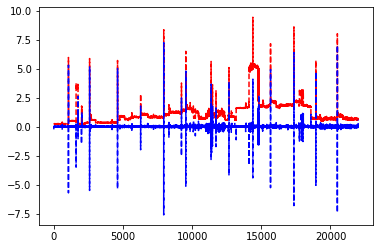

In [116]:
sample_ = vals[4][sli1:sli2]
plt.plot(sample_,"r--",convolve(sample_, sobel)[1:-1],"b--")

power.mean {device: Bottle-Warmer}


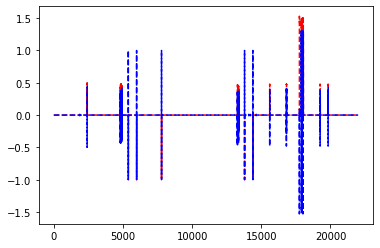

In [117]:
cate = 1

print(i2d[cate])
sample_ = vals[cate][sli1:sli2]
plt.plot(sample_,"r--",convolve(sample_, sobel)[1:-1],"b--")

power.mean {device: Fridge}


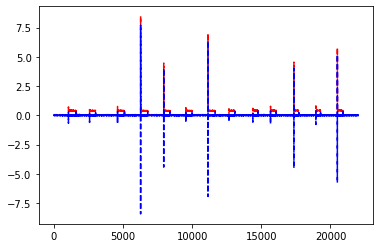

In [118]:
cate = 2

print(i2d[cate])
sample_ = vals[cate][sli1:sli2]
plt.plot(sample_,"r--",convolve(sample_, sobel)[1:-1],"b--")

power.mean {device: Lights}


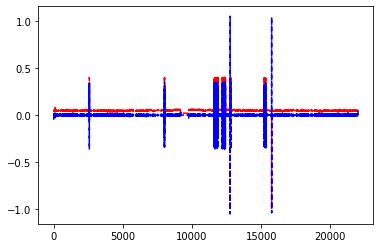

In [119]:
cate = 3

print(i2d[cate])
sample_ = vals[cate][sli1:sli2]
plt.plot(sample_,"r--",convolve(sample_, sobel)[1:-1],"b--")

power.mean {device: Washing-Machine}


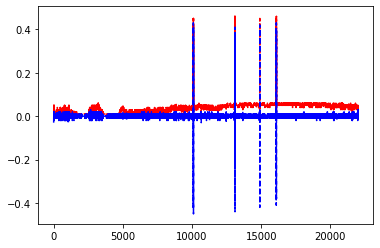

In [120]:
cate = 5

print(i2d[cate])
sample_ = vals[cate][sli1:sli2]
plt.plot(sample_,"r--",convolve(sample_, sobel)[1:-1],"b--")